In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

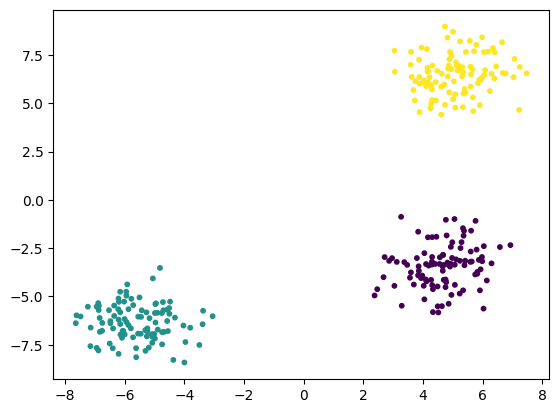

In [2]:
X, y = datasets.make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)
plt.show()

In [29]:
class KMeans:
    def __init__(self, k, max_iter = 1000):
        self.k = k
        self.centroids = None
        self.max_iter = max_iter
        self.y = None

    def fit(self, X: np.ndarray):
        n_samples, n_features = X.shape
        self.centroids = X[np.random.choice(n_samples, self.k, replace=False), :]
        prev_centroids = np.zeros_like(self.centroids)
        iter_no = 0

        while iter_no < self.max_iter:
            
            self.y = []

            for x in X:
                distances = []
                for centroid in self.centroids:
                    # print(centroid, x)
                    distance = self._distance(centroid, x)
                    distances.append(distance)
                self.y.append(np.argmin(distances))

            self.y = np.array(self.y)

            cluster_means = []
            for cluster_no in range(self.k):
                cluster_samples = X[np.argwhere(self.y == cluster_no).flatten(), : ]
                cluster_means.append(cluster_samples.mean(axis=0))

            self.centroids = np.array(cluster_means)
            
            if np.array_equal(self.centroids, prev_centroids):
                break
            
            prev_centroids = self.centroids.copy()
            iter_no += 1


    def _distance(self, a1: np.ndarray, a2: np.ndarray):
        return np.sqrt(np.sum(np.square(a1 - a2)))
    

[[ 4.65404098 -3.43383823]
 [ 5.09245016  6.49988032]
 [-5.59384138 -6.32170657]]


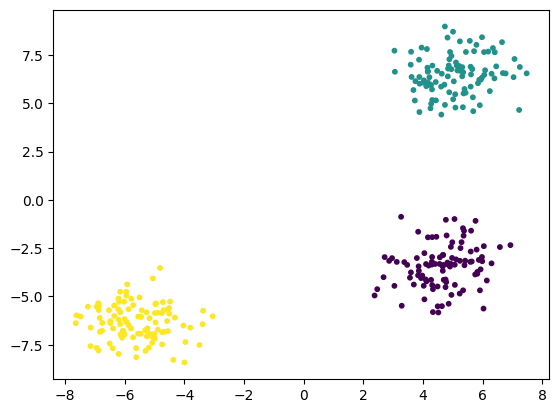

In [35]:
clf = KMeans(k=3, max_iter=10000)
clf.fit(X)

print(clf.centroids)

plt.scatter(X[:, 0], X[:, 1], s=10, c=clf.y)
plt.show()